In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
data = pd.read_csv('/content/drive/My Drive/data/halong_quality.csv', index_col='date')

In [18]:
data

,pm25,pm10,o3,no2,so2,co
date,,,,,,
3/1/2019,6,6,45,3,500,NaN
3/2/2019,59,55,1,6,500,NaN
3/3/2019,43,28,5,9,500,NaN
3/4/2019,27,3,4,16,500,NaN
3/5/2019,48,17,16,1,500,NaN
...,...,...,...,...,...,...
5/28/2024,64,32,48,9,500,NaN
5/29/2024,47,20,23,8,500,NaN
5/30/2024,40,6,49,9,500,NaN


In [19]:
data.fillna(method='ffill', inplace=True)
scaler = MinMaxScaler()
data['pm25'] = scaler.fit_transform(data[['pm25']])

In [20]:
def create_sequences(data, seq_length=10):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X, y = create_sequences(data['pm25'].values, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(seq_length, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               1408      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9729 (38.00 KB)
Trainable params: 9729 (38.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=12)

Epoch 1/50
144/144 [==============================] - 1s 3ms/step - loss: 0.0192 - val_loss: 0.0153
Epoch 2/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0175 - val_loss: 0.0131
Epoch 3/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0171 - val_loss: 0.0137
Epoch 4/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0172 - val_loss: 0.0131
Epoch 5/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0172 - val_loss: 0.0139
Epoch 6/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0167 - val_loss: 0.0128
Epoch 7/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0166 - val_loss: 0.0129
Epoch 8/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0162 - val_loss: 0.0123
Epoch 9/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.0136
Epoch 10/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0159 - val_loss: 0.0129

In [24]:
print('Actual value: %s'%str(y[-5:]))
print('Predict value:')
yhat = model.predict(X_test)
print(yhat)

Actual value: [0.37341772 0.26582278 0.22151899 0.0443038  0.20253165]
Predict value:
6/6 [==============================] - 0s 3ms/step
[[0.28294143]
 [0.5051185 ]
 [0.3799718 ]
 [0.38520855]
 [0.44585532]
 [0.51047504]
 [0.522058  ]
 [0.3063692 ]
 [0.3209771 ]
 [0.22634499]
 [0.40813082]
 [0.35429513]
 [0.2626967 ]
 [0.31475717]
 [0.323492  ]
 [0.30490386]
 [0.272902  ]
 [0.22597449]
 [0.21105227]
 [0.21388537]
 [0.3058648 ]
 [0.2630577 ]
 [0.13266608]
 [0.12835406]
 [0.18699586]
 [0.23995627]
 [0.22833647]
 [0.15377367]
 [0.23657626]
 [0.35297465]
 [0.40138018]
 [0.39987946]
 [0.3273028 ]
 [0.42797828]
 [0.37738502]
 [0.46691757]
 [0.42852247]
 [0.38632458]
 [0.29916975]
 [0.19823891]
 [0.24789107]
 [0.203575  ]
 [0.26868284]
 [0.3625269 ]
 [0.27283376]
 [0.24480122]
 [0.25425965]
 [0.24725462]
 [0.24838634]
 [0.31197435]
 [0.2735647 ]
 [0.2659366 ]
 [0.24069275]
 [0.17687194]
 [0.13648412]
 [0.16238289]
 [0.17488669]
 [0.20058443]
 [0.19053932]
 [0.12115984]
 [0.16650167]
 [0.23608

In [25]:
def RMSE(yhat, y):
    return np.sqrt(np.mean((yhat - y)**2))

yhat = model.predict(X)
RMSE(yhat, y)

60/60 [==============================] - 0s 2ms/step


0.1833887791664949

In [26]:
yhat_inverse = scaler.inverse_transform(np.array(yhat).reshape(-1, 1))

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y, yhat))
mape = mean_absolute_percentage_error(y, yhat)
mae = mean_absolute_error(y, yhat)

print("RMSE:", rmse)
print("MAPE:", mape)
print("MAE:", mae)

RMSE: 0.09194497476595577
MAPE: 25289539243487.867
MAE: 0.06903372195571715


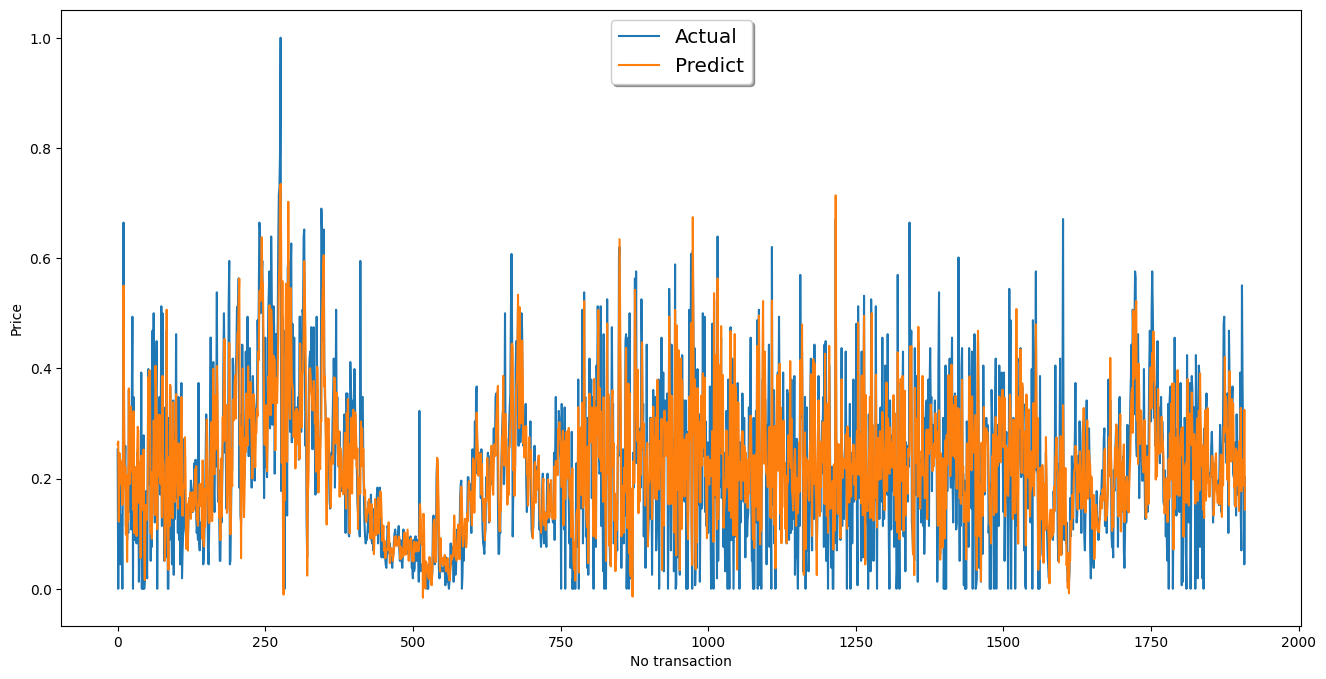

In [28]:
def plt_graph(y, yhat):
    plt.figure(figsize = (16, 8))
    plt.plot(y, label = 'Actual')
    plt.plot(yhat, label = 'Predict')
    plt.xlabel('No transaction')
    plt.ylabel('Price')
    legend = plt.legend(loc = 'upper center', shadow = True, fontsize = 'x-large')


plt_graph(y, yhat)


In [29]:
# Predict the next 90 days PM2.5 values
last_sequence = X_test[-1]
predictions = []
current_sequence = last_sequence

for _ in range(90):
    next_value = model.predict(current_sequence[np.newaxis, :, :])[0, 0]
    predictions.append(next_value)
    current_sequence = np.append(current_sequence[1:], [[next_value]], axis=0)

predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
print("Next 90 days PM2.5 predictions:", predictions.flatten())

1/1 [==============================] - 0s 20ms/step
Next 90 days PM2.5 predictions: [27.693798  38.69883   48.75677   45.199856  48.42752   36.730247
 30.96275   36.681744  37.941143  38.21478   37.82001   38.539207
 35.759865  32.151115  30.202068  28.883463  27.167904  26.134521
 26.700548  27.992077  28.644552  28.769007  27.77027   25.529945
 23.22389   22.376549  22.500767  22.898386  23.60954   23.622066
 22.207151  20.307478  18.247984  16.597412  15.387304  14.624987
 14.662446  15.346157  16.03847   15.52777   15.348562  15.8443165
 16.361246  17.109516  18.063803  18.709457  18.249758  17.787228
 17.881634  17.907166  17.67316   17.60877   17.32925   16.65227
 16.122297  16.31848   16.620045  16.765831  17.068918  17.17115
 16.964945  17.0097    17.4821    17.926756  18.039135  17.987097
 17.771315  17.32101   16.98282   16.973663  16.983204  16.797388
 16.72052   16.814442  16.914179  17.02659   17.33383   17.552307
 17.549896  17.55635   17.67957   17.639645  17.44718   17.

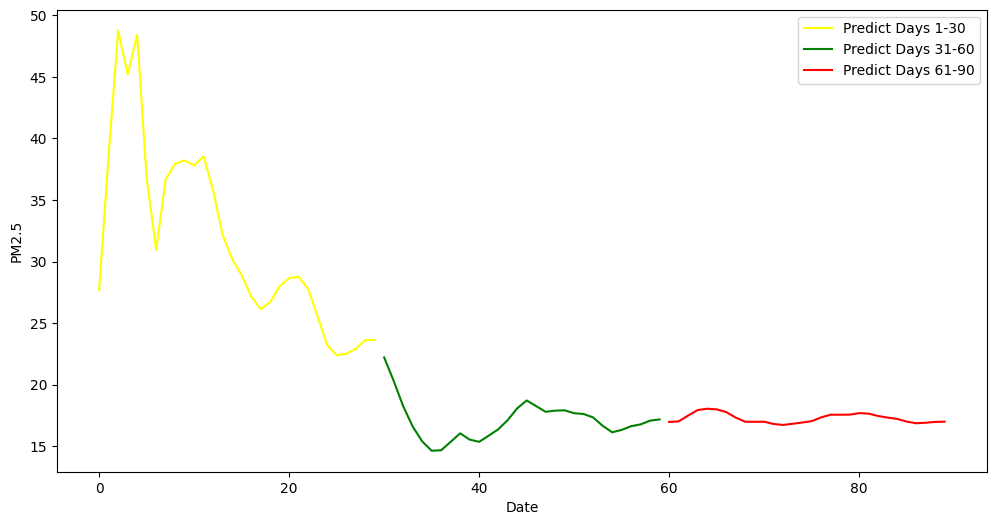

In [30]:
plt.figure(figsize=(12, 6))

dates = np.arange(1, 91)
df = pd.DataFrame({'Date': dates, 'predictions': predictions.flatten()}) # Flatten predictions to 1D array

plt.plot(df['predictions'][:30], color='yellow', label='Predict Days 1-30')
plt.plot(df['predictions'][30:60], color='green', label='Predict Days 31-60')
plt.plot(df['predictions'][60:], color='red', label='Predict Days 61-90')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()

# Show plot
plt.show()